In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="GnBu_d")

In [2]:
whr_2015 = pd.read_csv("2015.csv")

In [3]:
whr_2015.shape

(158, 12)

In [4]:
whr_2015.isnull().any().any()

False

In [5]:
whr_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
# df.rename(columns={'OldName': 'New Name'}, inplace=True)

#Renaming the columns 
whr_2015.columns = ["Country","Region","Happiness_Rank","Happiness_Score","Standard_Error","GDP","Family","Health","Freedom","Trust","Generosity","Dystopia_Residual"]

In [7]:
whr_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
whr_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country              158 non-null object
Region               158 non-null object
Happiness_Rank       158 non-null int64
Happiness_Score      158 non-null float64
Standard_Error       158 non-null float64
GDP                  158 non-null float64
Family               158 non-null float64
Health               158 non-null float64
Freedom              158 non-null float64
Trust                158 non-null float64
Generosity           158 non-null float64
Dystopia_Residual    158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [9]:
whr_2015.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**EDA**

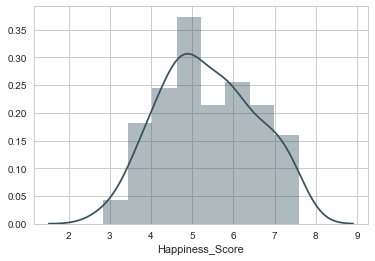

In [10]:
sns.distplot(whr_2015['Happiness_Score'])

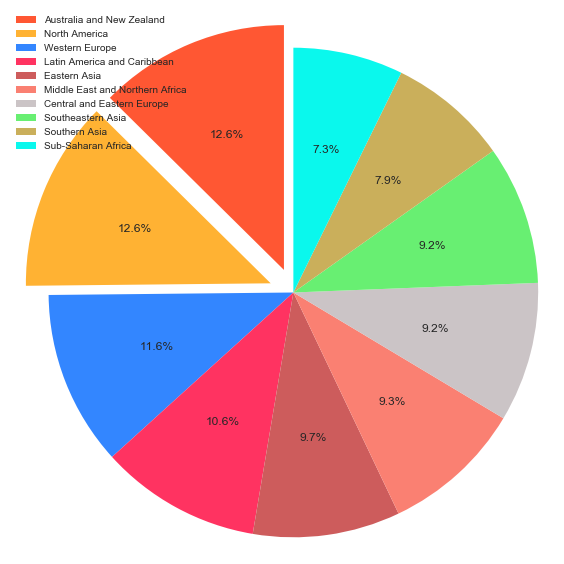

In [11]:
pie_data = whr_2015.groupby('Region', as_index=False)['Happiness_Score'].mean().sort_values(by='Happiness_Score', ascending=False)
plt.figure(figsize=(8,8))
happiness_score = pie_data['Happiness_Score']
region = pie_data['Region']
color = ['#FF5733','#FFB233', '#3386FF', '#FF3361', '#CD5C5C', '#FA8072', '#CBC4C6', '#68EF72', '#CAAF5B', '#0AF8ED']
explode = (0.1, 0.1, 0, 0,0,0,0,0,0,0)
plt.pie(happiness_score, startangle=90, autopct='%1.1f%%', explode=explode, colors=color)
plt.legend(region, loc=2)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()

From Above

"Australia and New Zealand" and "North America" Contributing 25% in Happiness score that is these regions have more happiest countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

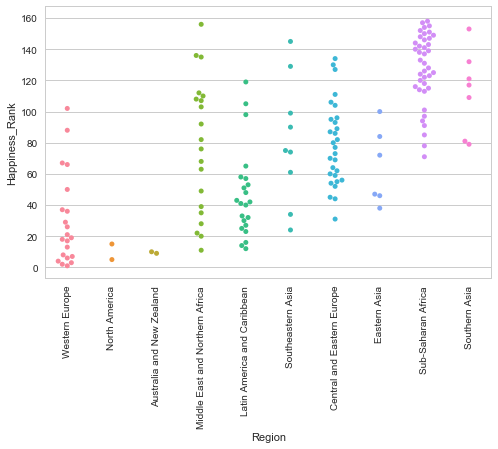

In [12]:
plt.figure(figsize=(8,5))
# sns.stripplot(x="Region", y="Happiness_Rank", data=whr_2015, jitter=True)
sns.swarmplot(x="Region", y="Happiness_Rank", data=whr_2015)
plt.xticks(rotation=90)

Above Chart showing intresting facts such as

- Southern Asia country Ranking start from rank ~80

- Austraila and New Zealand region counties lie under rank ~10

- Western Europe region countries mostly concentrated under rank 40

- Middle east and Northern Africa Show low rank also and high rank also

- Sub-Saharan Africa countries mostly concentrate above rank ~110

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

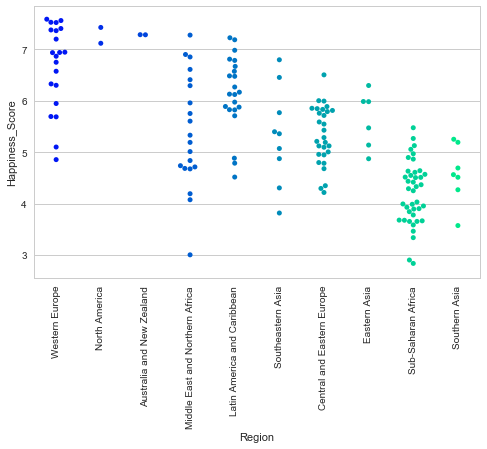

In [63]:
plt.figure(figsize=(8,5))
# sns.violinplot(x="Region", y="Happiness_Score",  data=whr_2015, palette='winter')
sns.swarmplot(x="Region", y="Happiness_Score",  data=whr_2015, palette='winter')
plt.xticks(rotation=90)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

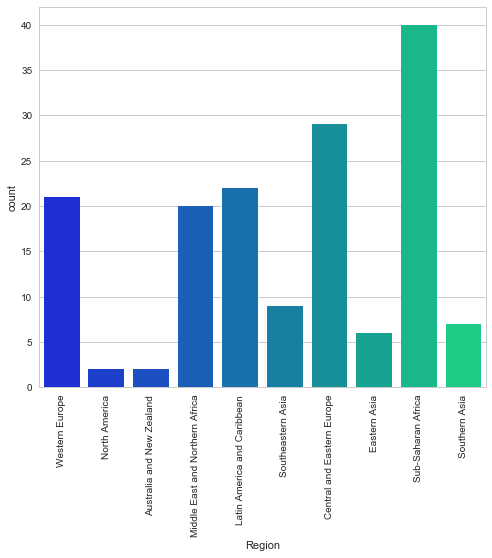

In [14]:
print(whr_2015.Region.value_counts())
plt.figure(figsize=(8,7))
sns.countplot('Region', data=whr_2015, palette='winter')
plt.xticks(rotation=90)

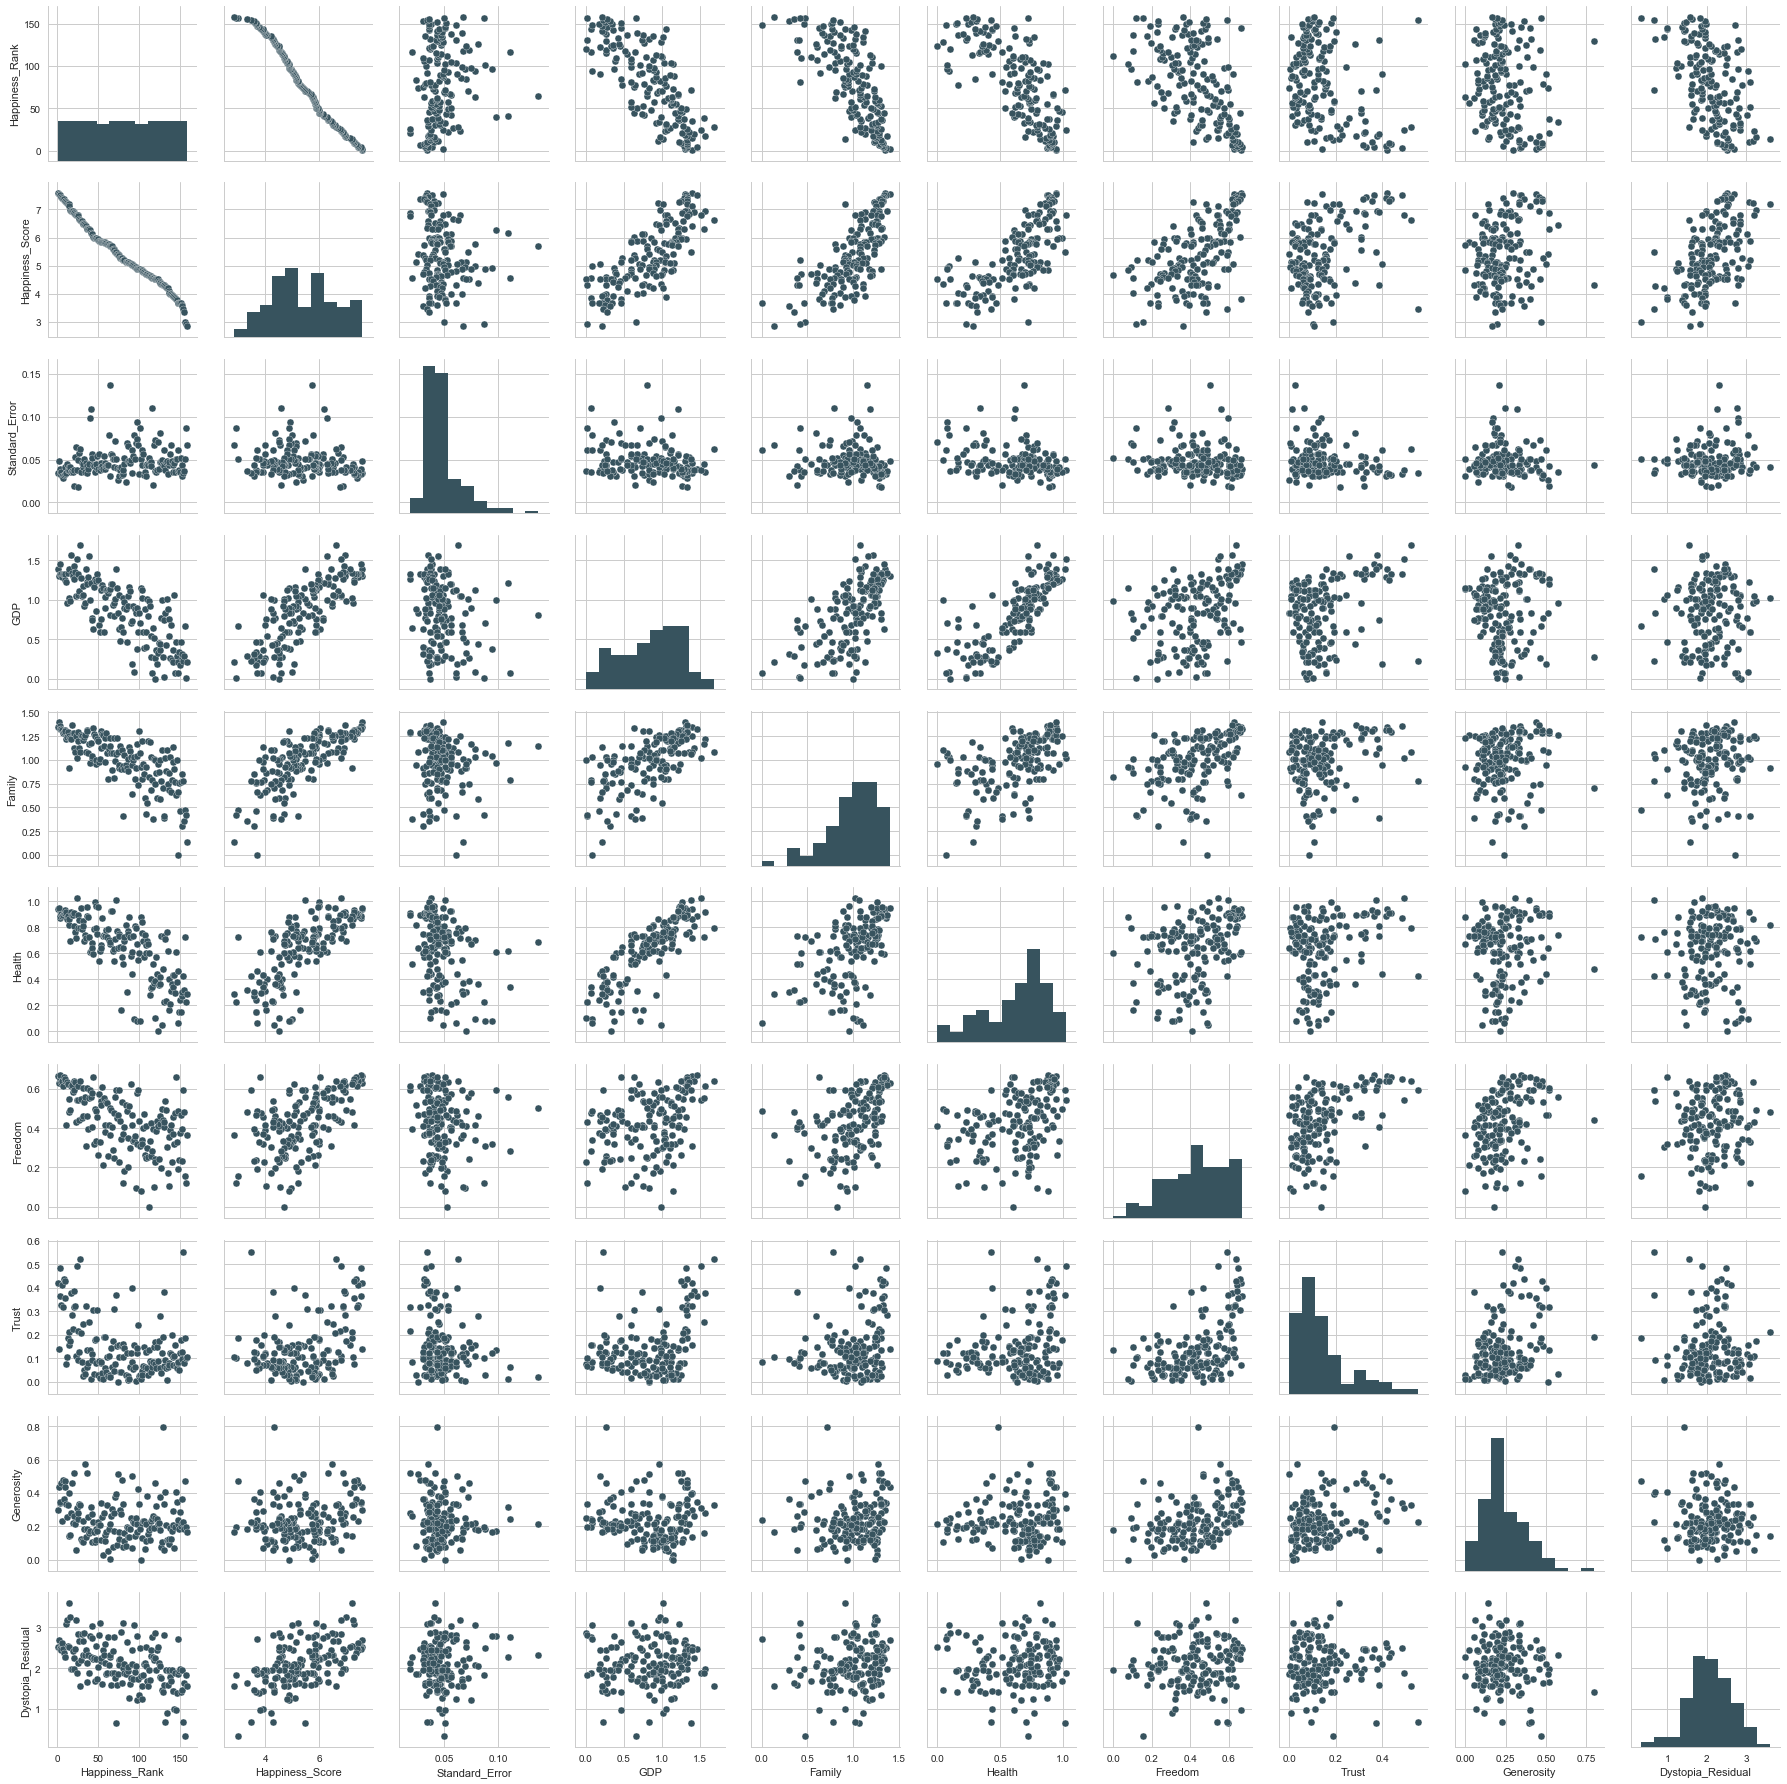

In [15]:
sns.pairplot(whr_2015)

We can see from above figur that ***"Economy (GDP per Capita), Health (Life Expectancy), Family, Freedom"** have good influence on Happiness score

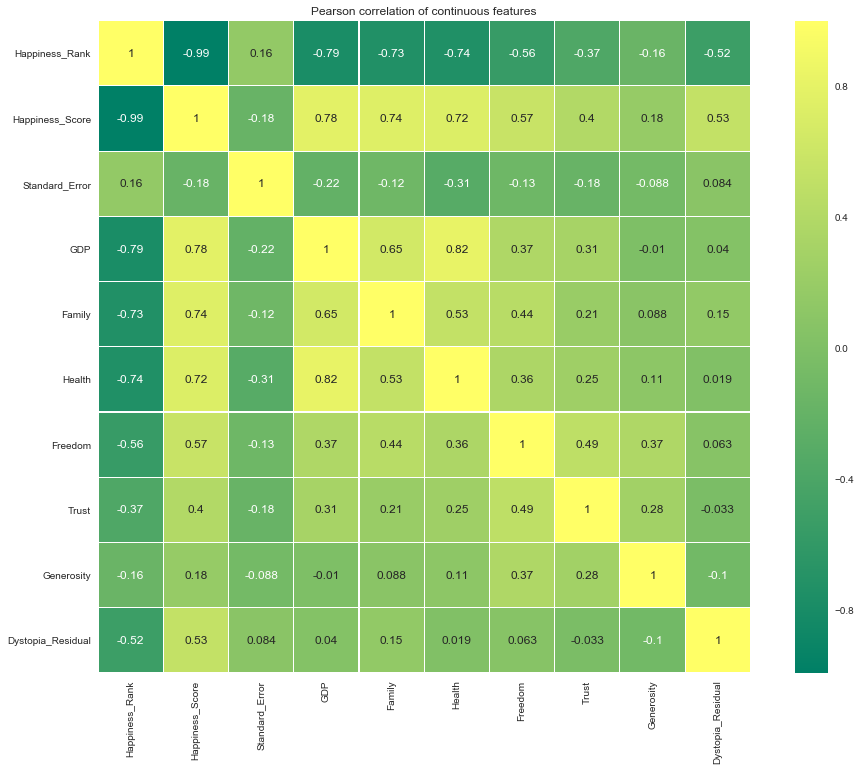

In [16]:
colormap = plt.cm.summer
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1, size=12)
sns.heatmap(whr_2015.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

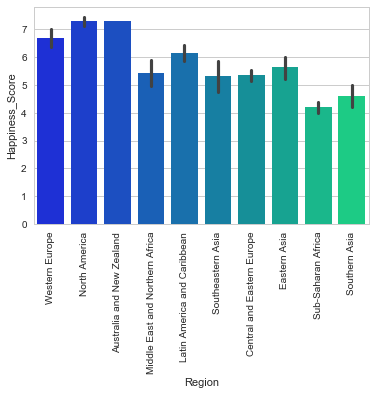

In [57]:
sns.barplot(x='Region', y='Happiness_Score', data=whr_2015, palette='winter')
plt.xticks(rotation=90)whr_2015.groupby('Region', as_index=False)['Happiness_Score'].mean().sort_values(by='Happiness_Score', ascending=False)

In [58]:
whr_2015.groupby('Region', as_index=False)['Happiness_Score'].mean().sort_values(by='Happiness_Score', ascending=False)

,Region,Happiness_Score
0,Australia and New Zealand,7.285000
5,North America,7.273000
9,Western Europe,6.689619
3,Latin America and Caribbean,6.144682
2,Eastern Asia,5.626167
4,Middle East and Northern Africa,5.406900
1,Central and Eastern Europe,5.332931
6,Southeastern Asia,5.317444
7,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

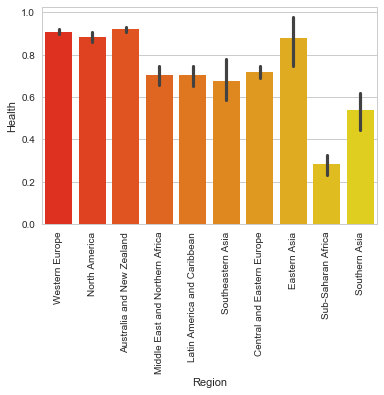

In [60]:
sns.barplot(x='Region', y='Health', data=whr_2015, palette='autumn')
plt.xticks(rotation=90)

In [18]:
whr_2015.groupby('Region', as_index=False)['Health'].mean().sort_values(by='Health', ascending=False)

,Region,Health
0,Australia and New Zealand,0.919965
9,Western Europe,0.909148
5,North America,0.883710
2,Eastern Asia,0.877388
1,Central and Eastern Europe,0.718774
4,Middle East and Northern Africa,0.705616
3,Latin America and Caribbean,0.703870
6,Southeastern Asia,0.677357
7,Southern Asia,0.540830
8,Sub-Saharan Africa,0.282332


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

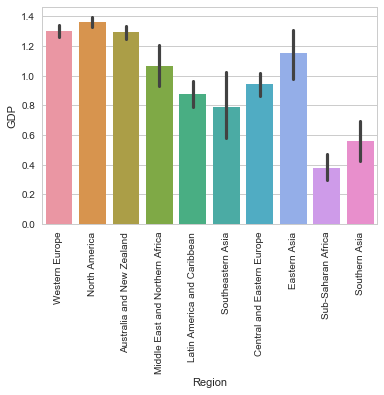

In [54]:
sns.barplot(x='Region', y='GDP', data=whr_2015)
plt.xticks(rotation=90)
# print(whr_2015.groupby('Region', as_index=False)['GDP'].mean().sort_values(by='GDP', ascending=False))

From above three tables we figure out that ***"North America, Western Europe, Australia and New Zealand"*** these three region are only in top three

In [20]:
print("Happiest country")
whr_2015[whr_2015.Happiness_Score == whr_2015['Happiness_Score'].max()][['Country', 'Happiness_Score']]

Happiest country


,Country,Happiness_Score
0,Switzerland,7.587


In [21]:
print("Happiest Region")
whr_2015.groupby('Region', as_index=False)['Happiness_Score'].mean().sort_values(by='Happiness_Score', ascending=False)[:1]

Happiest Region


,Region,Happiness_Score
0,Australia and New Zealand,7.285


In [55]:
# sns.barplot(x='Region', y='GDP', data=whr_2015, palette='coolwarm')
# plt.xticks(rotation=90)
plt.figure(figsize=(12,7))
print("Highest GDP Region")
(whr_2015.groupby('Region', as_index=False)['GDP'].mean().sort_values(by='GDP', ascending=False)[:1])

Highest GDP Region


,Region,GDP
5,North America,1.3604


In [23]:
print("Highest GDP country")
whr_2015[whr_2015.GDP == whr_2015['GDP'].max()][['Country','GDP']]

Highest GDP country


,Country,GDP
27,Qatar,1.69042


In [24]:
print("Healthiest country")
whr_2015[whr_2015.Health == whr_2015['Health'].max()][['Country','Health']]

Healthiest country


,Country,Health
23,Singapore,1.02525


In [59]:
print("Healthiest Region")
(whr_2015.groupby('Region', as_index=False)['Health'].mean().sort_values(by='Health', ascending=False)[:1])

Healthiest Region


,Region,Health
0,Australia and New Zealand,0.919965


In [51]:
print("Top 3 Healthiest Country")
(whr_2015.groupby('Country', as_index=False)['Health'].max().sort_values(by='Health', ascending=False)[:3])

Top 3 Healthiest Country


,Country,Health
123,Singapore,1.02525
56,Hong Kong,1.01328
68,Japan,0.99111


In [27]:
print("Top 3 GDP Country")
whr_2015.groupby('Country', as_index=False)['GDP'].max().sort_values(by='GDP', ascending=False)[:3]

Top 3 GDP Country


,Country,GDP
115,Qatar,1.69042
82,Luxembourg,1.56391
73,Kuwait,1.55422


In [28]:
print("Top 3 Happiest Country")
whr_2015.groupby('Country', as_index=False)['Happiness_Score'].max().sort_values(by='Happiness_Score', ascending=False)[:3]

Top 3 Happiest Country


,Country,Happiness_Score
135,Switzerland,7.587
58,Iceland,7.561
37,Denmark,7.527


**Switzerland** is the country which is not in top 3 in GDP but happiest and healthiest country

In [29]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = whr_2015['Country'],
           locationmode = 'country names',
           z = whr_2015['Happiness_Rank'], 
           text = whr_2015['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm

**Feature Selection**

In [31]:
X_cols = ['GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']
y_cols = ['Happiness_Score']

In [32]:
lm = LinearRegression()

#rank all features, i.e continue the elimination until the last one
rfe = RFE(lm, n_features_to_select=1)
rfe.fit(whr_2015[X_cols], whr_2015[y_cols] )
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_cols)))

Features sorted by their rank:
[(1, 'Health'), (2, 'Family'), (3, 'Trust'), (4, 'Dystopia_Residual'), (5, 'Generosity'), (6, 'GDP'), (7, 'Freedom')]


In [43]:
from sklearn.feature_selection import mutual_info_regression

mutual_info_regression(whr_2015[X_cols].values,whr_2015[y_cols].values,n_neighbors=3, random_state=17 )

array([ 0.50292317,  0.46360349,  0.49520452,  0.28199713,  0.1796093 ,
        0.03868424,  0.22769995])

Mutual information (MI) [1]_ between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency.

In [33]:
# X = whr_2015[['GDP', 'Health', 'Generosity', 'Dystopia_Residual', 'Family']]
X = whr_2015[X_cols]
y = whr_2015[y_cols]

In [34]:
liner_model=sm.OLS(y,X)
result=liner_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.608e+09
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        13:01:16   Log-Likelihood:                 1071.1
No. Observations:                 158   AIC:                            -2128.
Df Residuals:                     151   BIC:                            -2107.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GDP                   1.0001      0.00

With above summary Table we can say that all Features have 0 value which indicate that it is good to consider all feature.

**Model Building** and **Analysis the Model**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(whr_2015[X_cols], whr_2015[y_cols], test_size=0.3, random_state=101)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 1.00012295  0.99980749  1.0000027   0.99972268  0.99989286  0.99974863
   0.99995438]]


In [37]:
predicted = lm.predict(X_test)

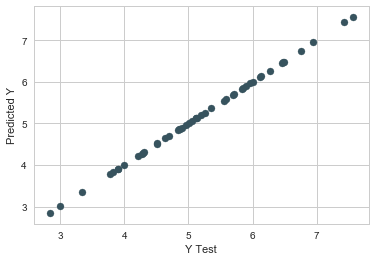

In [38]:
plt.scatter(y_test,predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 0.000267491057901
MSE: 9.50137342741e-08
RMSE: 0.000308242979278


The **Mean Absolute Error (or MAE)** is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction.

From above MAE value we can say There is less chance of error in model

The **mean_squared_error** function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

Above low value nearly 0 indicate low error loss

In [40]:
# Cross Validation

from sklearn.model_selection import cross_val_score

scores_whr = cross_val_score(lm, y_test, predicted, cv=5, n_jobs=-1, scoring = "neg_mean_squared_error")
whr_scores = np.sqrt(-scores_whr)
whr_scores.mean()

0.0002840790762755543

After cross validation of Root mean Squre Error. We foud only a little bit difference 

**whr_score = 0.0002840790762755543** and **RMSE = 0.000308242979278**

In [41]:
coeffecients = pd.DataFrame(lm.coef_.T,X.columns.to_series())
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
GDP,1.000123
Family,0.999807
Health,1.000003
Freedom,0.999723
Trust,0.999893
Generosity,0.999749
Dystopia_Residual,0.999954


In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted)
# predicted.shape

0.99999991729775717

This model has Good R2_Score nearly 1.